# Wrangling and Analyzing WeRateDogs twitter archive

This project aims to gather data from the [WeRateDogs Twitter archive](https://twitter.com/dog_rates). The data will be assessed and cleaned to prepare it for analysis using the most famous python libraries for data wrangling. Then, it will be analyzed to discover insights and create various visualizations. 

## Tables of contents:
- [1.Gather](#gather)
- [2.Assess](#assess)
- [3.Clean](#clean)
- [4.Analyze](#analyze)
- [5.Conclusions](#conclusions)

<a id="gather"></a>
## Gather:

The data will be downloaded using the twitter API and the [Tweepy library](https://pypi.org/project/tweepy/). The IDs of the tweets that need to be downloaded are in the file `twitter-archive-enhanced.csv`.

In [3]:
# Import the necessary packages
import tweepy
# Local file containing the api keys
import api_key
import pandas as pd
import numpy as np
import json
import time
import requests

In [2]:
# Load the file that contains the tweets' ids
dogs = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Create a handle to the API
'''
auth = tweepy.AppAuthHandler(api_key.API_KEY, api_key.API_SECRET_KEY)
api = tweepy.API(auth)

'''

'\nauth = tweepy.AppAuthHandler(api_key.API_KEY, api_key.API_SECRET_KEY)\napi = tweepy.API(auth)\n\n'

The downloaded data will be stored in the `tweet_json.txt` file.

In [4]:
''' The Twitter API allows for 300 requests / 15 min.
 This means that this app should sleep for at least 15 min in order
 to be able to make further requests.
'''
# The number of request made.
request_count = 1

for tweet_id in dogs.tweet_id:   
    
    if (request_count > 300):
        print('The request limit was reached, sleeping for 16 min')
        # Sleep for 16 min to be sure that twitter has reset the requests 
        time.sleep(16 * 60)
        # Reset the request count to zero
        request_count = 1
        
    try:
        print("Downloading tweet with id: " + str(tweet_id))
        # Retrieve the tweet
        status = api.get_status(tweet_id)
        # Write the tweet to the file
        with open('tweet_json.txt', 'a') as file:
            json.dump(status._json, file)
            # Add a new line after each json object 
            file.write('\n')

    except tweepy.RateLimitError:
        print('Reached the rate limit')

    except:
        print('Could not download the tweet with id: {}'.format(tweet_id))
    # Update the request count for each api call    
    print('Request number: {}'.format(request_count))
    request_count += 1


'\nrequest_count = 1\n\nfor tweet_id in dogs.tweet_id:   \n    \n    if (request_count > 300):\n        print(\'The request limit was reached, sleeping for 16 min\')\n        # Sleep for 16 min to be sure that twitter has reset the requests \n        time.sleep(16 * 60)\n        # Reset the request count to zero\n        request_count = 1\n        \n    try:\n        print("Downloading tweet with id: " + str(tweet_id))\n        # Retrieve the tweet\n        status = api.get_status(tweet_id)\n        # Write the tweet to the file\n        with open(\'tweet_json.txt\', \'a\') as file:\n            json.dump(status._json, file)\n            # Add a new line after each json object \n            file.write(\'\n\')\n\n    except tweepy.RateLimitError:\n        print(\'Reached the rate limit\')\n\n    except:\n        print(\'Could not download the tweet with id: {}\'.format(tweet_id))\n    # Update the request count for each api call    \n    print(\'Request number: {}\'.format(request_count

There is also a file containing dogs' breed predictions based on their picture. It will be downloaded and saved in a file named  `image_predictions.tsv`.

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# Retrieve the file
response = requests.get(url)
# Save the file
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)    

"\n\nurl = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'\n# Retrieve the file\nresponse = requests.get(url)\n# Save the file\nwith open('image_predictions.tsv', 'wb') as file:\n    file.write(response.content)\n    \n"

<a id="assess"></a>
## Assess:

In [6]:
# Assess visually the data
dogs.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
34,885528943205470208,NaN,NaN,2017-07-13 15:58:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maisey. She fell asleep mid-excavation...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885528943...,13,10,Maisey,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
1964,673350198937153538,NaN,NaN,2015-12-06 03:56:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's a Genghis Flopped Canuck....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673350198...,9,10,Bella,None,None,None,None
2265,667534815156183040,NaN,NaN,2015-11-20 02:47:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667534815...,8,10,Frank,None,None,None,None
1070,740359016048689152,NaN,NaN,2016-06-08 01:45:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chase. He's in a predicament. 9/10 hel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740359016...,9,10,Chase,None,None,None,None
2077,670833812859932673,NaN,NaN,2015-11-29 05:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jett. He is unimpressed by flower. 7/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670833812...,7,10,Jett,None,None,None,None
851,765669560888528897,NaN,NaN,2016-08-16 22:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tove. She's a Balsamic Poinsetter. Sur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765669560...,12,10,Tove,None,None,None,None
1307,707315916783140866,NaN,NaN,2016-03-08 21:23:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finnegus. He's trapped in a snow globe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707315916...,10,10,Finnegus,None,None,pupper,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
1961,673359818736984064,NaN,NaN,2015-12-06 04:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steve. He was just relaxing in hot tub...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673359818...,8,10,Steve,None,None,None,None


In [7]:
dogs.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [8]:
# Check missing values
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# Inspect numerical variables 
dogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
dogs.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [11]:
# Check the dog with the biggest rating numerator
dogs.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


After inspecting the tweet, it appears that 1776 is refering to the day of the independence of the USA. 

In [12]:
# Display the dogs with a rating numerator bigger than 20
dogs.query('rating_numerator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [13]:
# Get the number of dogs with a rating numerator bigger than 20
dogs.query('rating_numerator > 20').shape

(24, 17)

There are only 24 dogs with a rating numerator bigger than 20 from all our dataset. Some of these values don't represent real ratings like 1776,  666 that refers to Satan or 420 that rated the rapper [Snoop Dogg](https://en.wikipedia.org/wiki/Snoop_Dogg).

In [14]:
# Check the dog with the smallest rating numerator
dogs.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


The two tweets with a rating of 0 are not dog ratings. One of them is a picture of skyscrapers and the other is calling out plagiarism.

In [15]:
# Get the number of dogs with a rating numerator less than 10
dogs.query('rating_numerator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [16]:
# Get the text of the record with index 45
dogs.at[45,'text']

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

The rating numerator for the record above is 8 while it's 13.5 in the text.

In [17]:
# Extract the ratings from text
ratings_str = dogs.text.str.extract(r'(\d+(?:\.\d+)?/\d+(?:\.\d+)?)')
# Display the ratings with decimals
ratings_str[ratings_str[0].str.match(r'.+\..+')]

,0
45,13.5/10
340,9.75/10
695,9.75/10
763,11.27/10
1689,9.5/10
1712,11.26/10


There are 6 values with decimials and all of them have their decimal part in the numerator. Denominators are all integers.

In [18]:
dogs.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [19]:
# Get the dog with a denominator of zero
dogs.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


The record is a response to a tweet.

In [78]:
# Get the records where the rating_numerator is below 5
dogs.query('rating_numerator < 5')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,None,None,None,None
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,None,None,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066...,4,10,None,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1189,718246886998687744,NaN,NaN,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,None,None,None,None
1219,714631576617938945,NaN,NaN,2016-03-29 01:53:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He's a feisty pup. Needs a b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714631576...,4,10,Benedict,None,None,None,None


In [20]:
# Check the records where the rating_denominator is not equal to 10
dogs.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


The tweets with a rating denominator superior to 10 tend to rate pictures with several dogs in them but the number of dogs in those pictures doesn't always have a relationship with the denominator. For instance, if there are 6 dogs in the pictures, that doesn't mean that the rating denominator will be 10 * 3 = 30.

In [21]:
# Get the number of tweets with a rating denominator different from 10
dogs.query('rating_denominator != 10').shape

(23, 17)

In [22]:
# Get the text of the tweet with a rating denominator of 2 (the tweet with the index 2335)
dogs.at[2335,'text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

The tweet above contains two ratios: 1/2  which does not represent a dog rating and 9/10 which is the actual dog rating of the tweet. 

This also suggests that there may exist several ratings in a single tweet.

In [23]:
# Extract the ratings
match = dogs.text.str.findall(r'(\d+(?:\.\d+)?/\d+)')
# Create a series of the lengths of the matches
lens = match.apply(lambda x: len(x))
# Create a mask to extract the records with more than one element in the list
mask = lens > 1
# Get a subset of the dogs table with the records that have multiple ratings
# Exclude the records that are replies or retweets
multiple_rating_dogs = dogs[mask & (dogs.in_reply_to_status_id.isnull()) & (dogs.retweeted_status_id.isnull())][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]
# Add the ratings to our data
multiple_rating_dogs['ratings'] =  match[mask]
multiple_rating_dogs

,tweet_id,text,rating_numerator,rating_denominator,ratings
766,777684233540206592,"""Yep... just as I suspected. You're not flossi...",12,10,"[12/10, 11/10]"
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is ti...,10,10,"[10/10, 7/10]"
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11,"[9/11, 14/10]"
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20,"[4/20, 13/10]"
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50,"[50/50, 11/10]"
1222,714258258790387713,Meet Travis and Flurp. Travis is pretty chill ...,10,10,"[10/10, 8/10]"
1359,703356393781329922,This is Socks. That water pup w the super legs...,9,10,"[9/10, 2/10]"
1459,695064344191721472,This may be the greatest video I've ever been ...,4,10,"[4/10, 13/10]"
1465,694352839993344000,Meet Oliviér. He takes killer selfies. Has a d...,10,10,"[10/10, 5/10]"
1508,691483041324204033,When bae says they can't go out but you see th...,5,10,"[5/10, 10/10]"


The tweets with mutiple ratios represent the ratings of several dogs in a signle tweet. They can also be false values.

In [24]:
# Check for duplicates
sum(dogs.duplicated())

0

In [25]:
# Check for duplicated tweet ids 
sum(dogs.tweet_id.duplicated())

0

In [26]:
# Load tweet_json.txt in a dataframe
dogs_detailed = pd.read_json('tweet_json.txt', lines=True)

In [27]:
dogs_detailed.head()

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,34951,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,30267,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,22776,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,38230,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,36493,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [28]:
# Check the columns and their data type.
dogs_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2330 non-null   datetime64[ns, UTC]
 1   id                             2330 non-null   int64              
 2   id_str                         2330 non-null   int64              
 3   text                           2330 non-null   object             
 4   truncated                      2330 non-null   bool               
 5   entities                       2330 non-null   object             
 6   extended_entities              1815 non-null   object             
 7   source                         2330 non-null   object             
 8   in_reply_to_status_id          77 non-null     float64            
 9   in_reply_to_status_id_str      77 non-null     float64            
 10  in_reply_to_user_id     

In [29]:
# Check the numerical variables of interest
dogs_detailed[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,2330.000000,2330.000000
mean,2583.378970,7299.984979
std,4369.013788,11339.271992
min,1.000000,0.000000
25%,523.500000,1262.000000
50%,1206.000000,3162.500000
75%,2990.000000,8929.000000
max,74114.000000,150216.000000


In [30]:
# Get the tweet with the minimu favorite count
zero_favorite_count = dogs_detailed.query('favorite_count == 0')
zero_favorite_count.head(20)

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
31,2017-07-15 02:45:48+00:00,886054160059072513,886054160059072512,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,0.0,0.0,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,8.860534e+17,NaN
35,2017-07-13 01:35:06+00:00,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN
67,2017-06-26 00:13:58+00:00,879130579576475649,879130579576475648,RT @dog_rates: This is Emmy. She was adopted t...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN
72,2017-06-24 00:09:53+00:00,878404777348136964,878404777348136960,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN
73,2017-06-23 18:17:33+00:00,878316110768087041,878316110768087040,RT @dog_rates: Meet Terrance. He's being yelle...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN
77,2017-06-21 19:36:23+00:00,877611172832227328,877611172832227328,RT @rachel2195: @dog_rates the boyfriend and h...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,NaN,NaN,NaN
90,2017-06-13 01:14:41+00:00,874434818259525634,874434818259525632,RT @dog_rates: This is Coco. At first I though...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Sun May 21 16:48:45 +0000 2017...,NaN,NaN,NaN
95,2017-06-10 00:35:19+00:00,873337748698140672,873337748698140672,RT @dog_rates: This is Sierra. She's one preci...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 09 16:22:42 +0000 2017...,NaN,NaN,NaN
105,2017-06-04 00:46:17+00:00,871166179821445120,871166179821445120,RT @dog_rates: This is Dawn. She's just checki...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Mon Mar 13 00:02:39 +0000 2017...,NaN,NaN,NaN
119,2017-05-28 01:26:04+00:00,868639477480148993,868639477480148992,RT @dog_rates: Say hello to Cooper. His expres...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Sat May 27 19:39:34 +0000 2017...,NaN,NaN,NaN


The records with 0 favorite count are retweets according to this [twitter community issue](https://twittercommunity.com/t/retweet-count-and-favorite-count-always-zero/11092/26) and the correct value for favorite count is in the `retweeted_status` column. 

In [31]:
# Retrieve the retweeted status a record with a 0 favorite count
zero_favorite_count.at[31,'retweeted_status']

{'created_at': 'Sat Jul 15 02:44:07 +0000 2017',
 'id': 886053734421102592,
 'id_str': '886053734421102592',
 'text': '12/10 #BATP https://t.co/WxwJmvjfxo',
 'truncated': False,
 'entities': {'hashtags': [{'text': 'BATP', 'indices': [6, 11]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/WxwJmvjfxo',
    'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873',
    'display_url': 'twitter.com/dog_rates/stat…',
    'indices': [12, 35]}]},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 19607400,
  'id_str': '19607400',
  'name': "Oakland A's",
  'screen_name': 'Athletics',
  'location': 'Oakland, CA',
  'description': 'Official Twitter of the nine-time World Series champion Athletics | #RootedInOakland | Instagram: @athletics | Tik

The favorite count in retweeted status (1403) corresponds to the tweet. This means that the zeros are not missing values and because retweets are excluded from our analysis, there's no need to do anything about these values.

In [32]:
# Get the tweet with the minimum retweet count
dogs_detailed.query('retweet_count == 1')

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
279,2017-03-04 17:56:49+00:00,838085839343206401,838085839343206400,@bragg6of8 @Andy_Pace_ we are still looking fo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.380855e+17,8.380855e+17,...,135,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN


The tweet above is a reply to another and not an acutal rating.

In [33]:
# Load image_predictions.tsv
predictions = pd.read_csv('image_predictions.tsv', '\t')

In [34]:
# Display some records
predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [35]:
# Get the number of records
predictions.shape

(2075, 12)

In [36]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Quality issues:**

* The data type of the `timestamp` column in the `dogs` table is a string.
* Missing values in `doggo`, `puppo`, `pupper` and `floofer` columns in the `dogs` table.
* The missing values for `doggo`, `puppo`, `pupper` and `floofer` columns in the `dogs` table are represented by the string 'None' instead of 'NaN's.
* Many values in `rating_numerator` above 20 in the `dogs` table don't represent dog ratings (e.g., 1776 independence year of the USA, 666 the rating of Satan and 420 the rating of the rapper snoop dog).
* The two zero values for `rating_numerator` are not dog ratings.
* Some values for the `rating_numerator` column do not match the actual rating given in the tweet's text like the record at index 45.
* `rating_numerator` data type is int while some values are floats.
* When it comes to ratios in general, the value for the denominator has to be fixed but there are values in `rating_denominator` that are bigger than 10 representing the rating for several dogs in one picture.
* Some tweets contain more than one ratio. They can represent accurate ratings for several dogs in one tweet or false values:

    * The tweet with id 740373189193256964 has a false rating, the 9 in the numerator and the 11 for the denominator is referring to the terrorist attacks of the 9/11 (index 1068).
    * The tweet with id 722974582966214656 has a false rating, the 4 in the numerator and the 20 in the denominator refer to April 20 which is a celebration for smoking cannabis (index 1165).
    * The tweet with id 716439118184652801 has a false rating, the 50 in the numerator and the 50 in the denominator refer to a match score (index 1202).
    * The tweet with id 695064344191721472 rates a video of a snake and not a dog. (index 1459)
    * The tweet with id 682962037429899265 has a false rating, the 7 in the numerator and the 11 in the denominator refer to the 7-Eleven stores in the US (index 1662).
    * The tweet with id 674646392044941312 has a false rating, the 5 in the numerator and the 10 in the denominator refer to the rating of a duck in the image (index 1901).
    * The tweet with id 667491009379606528 doesn't rate a dog (index 2272).
    * The tweet with id 666287406224695296 has a false rating, the 1 in the numerator and the 2 in the denominator refer to the number 0.5 (a half) (index 2335).
    * The following tweets with idices: 1007, 1222, 1508, 1525, 1538, 1795, 2113, 2177 contain a photo with two dogs of different breeds.


* Some tweets are retweets or replies to other tweets and not actual dog ratings.
* Most of the records with a `rating_numerator` below 5 are not about dogs.
* Many tweets don't rate dog pictues.

**Tidiness issues:**

* The `doggo`, `puppo`, `pupper` and `floofer` columns in the `dogs` table represent the same variable. 
* Repeated columns in `dogs_detailed` (`tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `timestamp`, `source`, `text`, `retweeted_status_id`, `retweeted_status_user_id`)
* `dogs`, `dogs_detailed` and `predictions` need to be in the same table for the analysis.

<a id="clean"></a>
## Clean:

In [37]:
# Create copies of the tables
clean_dogs = dogs.copy()
clean_dogs_detailed = dogs_detailed.copy()
clean_predictions = predictions.copy()

- **Missing values in `doggo`, `puppo`, `pupper` and `floofer` columns in the `dogs` table.**
- **The missing values for doggo, puppo, pupper and floofer columns in the dogs table are represented by the string 'None' instead of 'NaN's.**

**Define:**

Use regex to extract the dog stages from the `text` column. The extract function returns a NaN when It is unable to capture a group so it will also replace the previous 'None' values with NaN.

**Code:**

In [38]:
clean_dogs.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

Doggo column:

In [39]:
# Get the number of doggos
clean_dogs.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [40]:
# extract the possible patterns for the word doggo
clean_dogs.doggo = clean_dogs.text.str.extract(r'([dD]+[oO]+[gG]+[oO]+)')
# replace all the extracted patterns with 'doggo'
clean_dogs.doggo = clean_dogs.doggo.apply(lambda x: 'doggo' if x is not np.nan else np.nan)

Floofer column:

In [41]:
# Get the number of floofer
clean_dogs.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [42]:
# extract the possible patterns for the word floofer
clean_dogs.floofer = clean_dogs.text.str.extract(r'([fF]+[lL]+[oO]+[fF]+[eE]+[rR]+)')
# replace all the extracted patterns with 'floofer'
clean_dogs.floofer = clean_dogs.floofer.apply(lambda x: 'floofer' if x is not np.nan else np.nan)

Pupper column:

In [43]:
# Get the number of pupper
clean_dogs.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [44]:
# extract the possible patterns for the word pupper
clean_dogs.pupper = clean_dogs.text.str.extract(r'([pP]+[uU]+[pP]+[eE]+[rR]+)')
# replace all the extracted patterns with 'pupper'
clean_dogs.pupper = clean_dogs.pupper.apply(lambda x: 'pupper' if x is not np.nan else np.nan)

Puppo column:

In [45]:
# Get the number of puppo
clean_dogs.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [46]:
# extract the possible patterns for the word puppo
clean_dogs.puppo = clean_dogs.text.str.extract(r'([pP]+[uU]+[pP]+[oO]+)')
# replace all the extracted patterns with 'puppo'
clean_dogs.puppo = clean_dogs.puppo.apply(lambda x: 'puppo' if x is not np.nan else np.nan)

**Test:**

In [47]:
# print the number of doggos
print(clean_dogs.doggo.value_counts())
# print the number of null values
print(clean_dogs.doggo.isnull().sum())

doggo    107
Name: doggo, dtype: int64
2249


There was a gain of 10 doggos.

In [48]:
# print the number of floofer
print(clean_dogs.floofer.value_counts())
# print the number of null values
print(clean_dogs.floofer.isnull().sum())

floofer    10
Name: floofer, dtype: int64
2346


There was no gain for floofer.

In [49]:
# print the number of pupper
print(clean_dogs.pupper.value_counts())
# print the number of null values
print(clean_dogs.pupper.isnull().sum())

pupper    283
Name: pupper, dtype: int64
2073


There was a gain of 26 puppers.

In [50]:
# print the number of puppo
print(clean_dogs.puppo.value_counts())
# print the number of null values
print(clean_dogs.puppo.isnull().sum())

puppo    38
Name: puppo, dtype: int64
2318


There was a gain of 8 puppos.

-  **The tweet with id 740373189193256964 has a false rating, the 9 in the numerator and the 11 for the denominator is referring to the terrorist attacks of the 9/11 (index 1068).**
- **The tweet with id 722974582966214656 has a false rating, the 4 in the numerator and the 20 in the denominator refer to April 20 which is a celebration for smoking cannabis (index 1165).**
- **The tweet with id 716439118184652801 has a false rating, the 50 in the numerator and the 50 in the denominator refer to a match score (index 1202).**
- **The tweet with id 695064344191721472 rates a video of a snake and not a dog. (index 1459)**
- **The tweet with id 682962037429899265 has a false rating, the 7 in the numerator and the 11 in the denominator refer to the 7-Eleven stores in the US (index 1662).**
- **The tweet with id 674646392044941312 has a false rating, the 5 in the numerator and the 10 in the denominator refer to the rating of a duck in the image (index 1901).**
- **The tweet with id 667491009379606528 doesn't rate a dog (index 2272).**
- **The tweet with id 666287406224695296 has a false rating, the 1 in the numerator and the 2 in the denominator refer to the number 0.5 (a half) (index 2335).**
- **The following tweets with idices: 1007, 1222, 1508, 1525, 1538, 1795, 2113, 2177 contain a photo with two dogs of different breeds.**

**Define:**


* Assign the rating of 14/10 for the tweet with id 740373189193256964 (index 1068).
* Assign the rating of 13/10 for the tweet with id 722974582966214656 (index 1165).
* Assign the rating of 11/10 for the tweet with id 716439118184652801 (index 1202).
* Delete the record with the tweet id 695064344191721472 (index 1459).
* Assign the rating of 10/10 for the tweet with id 682962037429899265 (index 1662).
* Assign the rating of 8/10 for the tweet with id 674646392044941312 (index 1901).
* Delete the record with the tweet id 667491009379606528 (index 2272).
* Assign the rating of 9/10 for the tweet with id 666287406224695296 (index 2335).
* Delete the tweets with two dogs of different breeds because the breed recognizer returns only one breed per picture. 

**Code:**

In [51]:
# Assign the rating of 14/10 for the tweet with id 740373189193256964 (index 1068).
clean_dogs.at[1068,'rating_numerator'] = 14
clean_dogs.at[1068,'rating_denominator'] = 10
# Assign the rating of 13/10 for the tweet with id 722974582966214656 (index 1165).
clean_dogs.at[1165,'rating_numerator'] = 13
clean_dogs.at[1165,'rating_denominator'] = 10
# Assign the rating of 11/10 for the tweet with id 716439118184652801 (index 1202).
clean_dogs.at[1202,'rating_numerator'] = 11
clean_dogs.at[1202,'rating_denominator'] = 10
# Assign the rating of 10/10 for the tweet with id 682962037429899265 (index 1662).
clean_dogs.at[1662,'rating_numerator'] = 10
clean_dogs.at[1662,'rating_denominator'] = 10
# Assign the rating of 8/10 for the tweet with id 674646392044941312 (index 1901).
clean_dogs.at[1901,'rating_numerator'] = 8
clean_dogs.at[1901,'rating_denominator'] = 10
# Assign the rating of 9/10 for the tweet with id 666287406224695296 (index 2335).
clean_dogs.at[2335,'rating_numerator'] = 9
clean_dogs.at[2335,'rating_denominator'] = 10

In [52]:
# List of the indices of the tweets that do not represent dog ratings
not_dogs = [1459, 2272]
# List of the indices of the tweets with two dogs of different breeds
two_dogs = [1007, 1222, 1508, 1525, 1538, 1795, 2113, 2177]
# Delete the desired rows
clean_dogs.drop(not_dogs + two_dogs, inplace=True)

**Test:**

In [53]:
# Extract the ratings
match = clean_dogs.text.str.findall(r'(\d+(?:\.\d+)?/\d+)')
# Create a series of the lengths of the matches
lens = match.apply(lambda x: len(x))
# Create a mask to extract the records with more than one element in the list
mask = lens > 1
# Get a subset of the dogs table with the records that have multiple ratings
# Exclude the records that are replies or retweets
multiple_rating_dogs = clean_dogs[mask & (clean_dogs.in_reply_to_status_id.isnull()) & (clean_dogs.retweeted_status_id.isnull())][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]
# Add the ratings to our data
multiple_rating_dogs['ratings'] =  match[mask]
multiple_rating_dogs

,tweet_id,text,rating_numerator,rating_denominator,ratings
766,777684233540206592,"""Yep... just as I suspected. You're not flossi...",12,10,"[12/10, 11/10]"
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",14,10,"[9/11, 14/10]"
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,13,10,"[4/20, 13/10]"
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,11,10,"[50/50, 11/10]"
1359,703356393781329922,This is Socks. That water pup w the super legs...,9,10,"[9/10, 2/10]"
1465,694352839993344000,Meet Oliviér. He takes killer selfies. Has a d...,10,10,"[10/10, 5/10]"
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,10,10,"[7/11, 10/10]"
1832,676191832485810177,These two pups just met and have instantly bon...,10,10,"[10/10, 7/10]"
1897,674737130913071104,Meet Rufio. He is unaware of the pink legless ...,10,10,"[10/10, 4/10]"
1901,674646392044941312,Two gorgeous dogs here. Little waddling dog is...,8,10,"[5/10, 8/10]"


The changes were applied.

- **Some values for the rating_numerator column do not match the actual rating given in tweet's text like the record at index 45.**
- **`rating_numerator` data type is int while some values are floats..**

**Define:**

* Use regex to extract the ratings with and without decimals from the `text` column.
* Change `rating_numerator` data type to float.

**Code:**

In [54]:
# Extract the ratings in a new column
clean_dogs['rating_str'] = clean_dogs.text.str.extract(r'(\d+(?:\.\d+)?/\d+)')
# Extract the numerator and cast it to float
clean_dogs.rating_numerator = clean_dogs.rating_str.apply(lambda x: x.split('/')[0]).astype(float)
# Extract the denominator
clean_dogs.rating_denominator = clean_dogs.rating_str.apply(lambda x: x.split('/')[1]).astype(int)
# Delete rating_str column
clean_dogs.drop(columns='rating_str', inplace=True)

**Test:**

In [55]:
# Get the records with a decimal numerator
clean_dogs[clean_dogs.rating_numerator % 1 != 0]['rating_numerator']

45      13.50
340      9.75
695      9.75
763     11.27
1689     9.50
1712    11.26
Name: rating_numerator, dtype: float64

All the ratings with decimals have their correct value and the data type for the `rating_numerator` column is float.

- **Repeated columns in dogs_detailed (tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id)**
- **dogs, dogs_detailed and predictions need to be in the same table for the analysis.**

**Define:**

- Extract `retweet_count` and `favorite_count` from `clean_dogs_detailed` and merge them with `clean_dogs`.
- Extract `p1`, `p1_conf` and `p1_dog` from `clean_predictions` and merge them with`clean_dogs`.

**Code:**

In [56]:
clean_dogs.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,NaN,NaN,NaN


In [57]:
# Extract retweet count, favorite count and id (for merging)
counts = clean_dogs_detailed[['id', 'favorite_count', 'retweet_count']]

In [58]:
# Rename the id column to 'tweet_id' in order to merge the counts table with clean_dogs
counts.rename(columns={'id':'tweet_id'}, inplace=True)

C:\Users\ACER\Anaconda3\lib\site-packages\pandas\core\frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
# Merge counts and clean_dogs
clean_dogs = clean_dogs.merge(counts, on = 'tweet_id')

In [60]:
# Extract p1, p1_conf and p1_dog
first_probability = clean_predictions[['p1', 'p1_conf', 'p1_dog', 'tweet_id']]

In [61]:
# Merge first_probability with clean_dogs
clean_dogs = clean_dogs.merge(first_probability, on='tweet_id')

**Test:**

In [62]:
clean_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,p1,p1_conf,p1_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,Phineas,NaN,NaN,NaN,NaN,34951,7333,orange,0.097049,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,NaN,NaN,NaN,NaN,30267,5473,Chihuahua,0.323581,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Archie,NaN,NaN,NaN,NaN,22776,3620,Chihuahua,0.716012,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Darla,NaN,NaN,NaN,NaN,38230,7524,paper_towel,0.170278,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Franklin,NaN,NaN,NaN,NaN,36493,8095,basset,0.555712,True


- **Some tweets are retweets or replies to other tweets and not actual dog ratings.**

**Define:**

Delete the rows with a non-null `in_reply_to_status_id` and `retweeted_status_id`.

**Code:**

In [63]:
clean_dogs = clean_dogs[(clean_dogs.in_reply_to_status_id.isnull()) & (clean_dogs.retweeted_status_id.isnull())]

**Test:**

In [64]:
clean_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 2047
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1953 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1953 non-null   object 
 4   source                      1953 non-null   object 
 5   text                        1953 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1953 non-null   object 
 10  rating_numerator            1953 non-null   float64
 11  rating_denominator          1953 non-null   int32  
 12  name                        1953 non-null   object 
 13  doggo                       78 no

- **The `doggo`, `puppo`, `pupper` and `floofer` columns in the `dogs` table represent the same variable.**

**Define:**
- Delete the columns that were used to identify retweets and replies as they are not useful anymore. (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`')

- Use the melt function to create the `dog_stage` column from `doggo`, `puppo`, `pupper` and `floofer` columns.

**Code:**

In [65]:
# Delete columns
clean_dogs.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], inplace=True)

In [66]:
# Create dog_stage column from doggo, puppo, pupper and floofer colums
clean_dogs = pd.melt(clean_dogs, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name',  'favorite_count', 'retweet_count', 'p1', 'p1_conf',
       'p1_dog'], value_name='dog_stage')

In [67]:
# Delete the variable column
clean_dogs.drop(columns='variable', inplace=True)

In [68]:
# Drop the duplicated rows
clean_dogs = clean_dogs.sort_values(by = ['tweet_id', 'dog_stage']).drop_duplicates('tweet_id', keep = 'first')

**Test:**

In [69]:
clean_dogs.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,p1,p1_conf,p1_dog,dog_stage
1952,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10,None,2342,443,Welsh_springer_spaniel,0.465074,True,NaN
1951,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,a,117,41,redbone,0.506826,True,NaN
1950,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,a,106,39,German_shepherd,0.596461,True,NaN
1949,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,a,259,122,Rhodesian_ridgeback,0.408143,True,NaN
1948,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,None,93,38,miniature_pinscher,0.560311,True,NaN


In [70]:
clean_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 1952 to 0
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1953 non-null   int64  
 1   timestamp           1953 non-null   object 
 2   source              1953 non-null   object 
 3   text                1953 non-null   object 
 4   expanded_urls       1953 non-null   object 
 5   rating_numerator    1953 non-null   float64
 6   rating_denominator  1953 non-null   int32  
 7   name                1953 non-null   object 
 8   favorite_count      1953 non-null   int64  
 9   retweet_count       1953 non-null   int64  
 10  p1                  1953 non-null   object 
 11  p1_conf             1953 non-null   float64
 12  p1_dog              1953 non-null   bool   
 13  dog_stage           336 non-null    object 
dtypes: bool(1), float64(2), int32(1), int64(3), object(7)
memory usage: 207.9+ KB


**When it comes to ratios in general, the value for the denominator has to be fixed but there are values in rating_denominator that are bigger than 10 representing the rating for several dogs in one picture.**

**Define:**

Delete the rows with a rating_denominator different from 10.

**Code:**

In [71]:
clean_dogs = clean_dogs[clean_dogs.rating_denominator == 10]

**Test:**

In [72]:
clean_dogs.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,p1,p1_conf,p1_dog,dog_stage


In [73]:
clean_dogs.query('rating_numerator > 20')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,p1,p1_conf,p1_dog,dog_stage
1681,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,None,22872,7931,microphone,0.096063,False,NaN
716,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,4938,2373,bow_tie,0.533941,False,NaN


**Many values in rating_numerator above 20 in the dogs table don't represent dog ratings (e.g., 1776 independence year of the USA, 666 the rating of Satan and 420 the rating of the rapper snoop dog).**

**Define:**

Delete the rows with a rating_numerator above 20.

As almost all the rows with a rating_numerator above 20 had a rating_denominator different from 10, most of them were deleted previously.

**Code:**

In [74]:
clean_dogs = clean_dogs[clean_dogs.rating_numerator < 20]

**Test:**

In [75]:
clean_dogs.query('rating_numerator > 20')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,p1,p1_conf,p1_dog,dog_stage


**The two zero values for rating_numerator are not dog ratings.**

**Define:**

Delete the rows with a zero rating_numerator.

**Code:**

In [76]:
clean_dogs = clean_dogs[clean_dogs.rating_numerator != 0]

**Test:**

In [77]:
clean_dogs[clean_dogs.rating_numerator == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,p1,p1_conf,p1_dog,dog_stage


**Most of the records with a `rating_numerator` below 5 are not about dogs.**

**Define:**

Delete the records with a `rating_numerator` below 5.

**Code:**

In [79]:
clean_dogs = clean_dogs[clean_dogs.rating_numerator > 5]

**Test:**

In [80]:
clean_dogs[clean_dogs.rating_numerator <= 5]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,p1,p1_conf,p1_dog,dog_stage


**The data type of the `timestamp` column in the `dogs` table is a string.**

**Define:**

Convert `timestamp`'s data type to datetime

**Code:**

In [83]:
clean_dogs.timestamp =  pd.to_datetime(clean_dogs.timestamp) 

C:\Users\ACER\Anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**Test:**

In [84]:
clean_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1856 entries, 1952 to 0
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1856 non-null   int64              
 1   timestamp           1856 non-null   datetime64[ns, UTC]
 2   source              1856 non-null   object             
 3   text                1856 non-null   object             
 4   expanded_urls       1856 non-null   object             
 5   rating_numerator    1856 non-null   float64            
 6   rating_denominator  1856 non-null   int32              
 7   name                1856 non-null   object             
 8   favorite_count      1856 non-null   int64              
 9   retweet_count       1856 non-null   int64              
 10  p1                  1856 non-null   object             
 11  p1_conf             1856 non-null   float64            
 12  p1_dog              1856 non-null 

**Many tweets don't rate dog pictues.**

**Define:**

Delete the tweets that the breed recognizer didn't indentify as dogs. (where `p1_dog` is `False`)

**Code:**

In [91]:
clean_dogs = clean_dogs[clean_dogs.p1_dog]

**Test:**

In [92]:
sum(~clean_dogs.p1_dog)

0

Store the cleaned data in a file names `twitter_archive_master.csv`.

In [95]:
clean_dogs.to_csv('twitter_archive_master.csv', index = False)

<a id="analyze"></a>
## Analyze:

The following analysis will attempt to answer the questions below:

- What's the distribution of retweet count ?
- What's the distribution of favorite count ?
- What's the relationship between favorite count and retweet count ?
- What's the relationship between rating numerator and retweet count ?
- What's the relationship between the predicted breed and retweet count ?
- What's the relationship between dog stage and retweet count ?




In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Load the cleaned dog data
df = pd.read_csv('twitter_archive_master.csv')

Define a function to work with linear relationships.

In [6]:
def describe_relationship(x ,y, xlabel, ylabel, title, size =(8,8)):
    ''' Draws a scatter plot of two variables, the line of best fit and prints the correlation coefficient,
    the coefficient of determination, the slope and intercept of the line of best fit
    
    Parameters
    ----------
    x : pandas Series
        The data to plot on the x-axis
        
    y : pandas Series
        The data to plot on the y-axis
    
    xlabel : str
        The x label of the plot
        
    ylabel : str
        The y label of the plot
    
    title : str
        The title of the plot
        
    size : tuple of ints
        The figure size of the plot
        
    Returns
    -------
    ax
        The Axes object of the plot
    '''
    # Draw the scatterplot
    _, ax = plt.subplots(figsize=size)
    ax.scatter(x, y)
    # Get the line of best fit arguments
    slope, intercept = np.polyfit(x, y, 1)
    # Draw the line of best fit
    ax.plot(x, slope * x + intercept, color = 'black')
    # Set the title, xlabel and ylabel
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    # Calculate the correlation coefficient
    r = x.corr(y)
    # Calculate the coefficient of determination
    rsquared = np.square(r)
    # Print our values
    print('The coefficient of correlation is: ' + str(r))
    print('The coefficient of determination is: ' + str(rsquared))
    print('The slope of the line of best fit is: ' + str(slope))
    print('The intercept of the line of best fit is: ' + str(intercept))
    # Return the axes object for more customization
    return ax

**What's the distribution of retweet count ?**

Text(0, 0.5, 'Frequency')

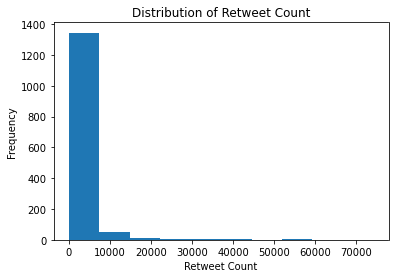

In [7]:
plt.hist(df.retweet_count)
plt.title('Distribution of Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')

The distribution of retweet count is right skewed.

In [8]:
df.retweet_count.describe()

count     1417.000000
mean      2395.873677
std       4337.390684
min         11.000000
25%        560.000000
50%       1235.000000
75%       2760.000000
max      74114.000000
Name: retweet_count, dtype: float64

75% of the tweets have less than 2760 retweets.

**What's the distribution of favorite count ?**

Text(0, 0.5, 'Frequency')

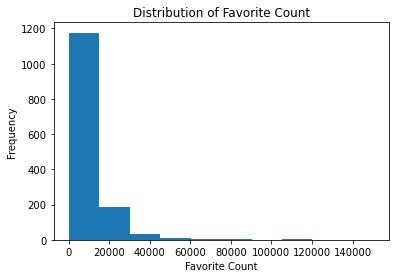

In [9]:
plt.hist(df.favorite_count)
plt.title('Distribution of Favorite Count')
plt.xlabel('Favorite Count')
plt.ylabel('Frequency')

The distribution of favorite count is also right skewed.

In [10]:
df.favorite_count.describe()

count      1417.000000
mean       8458.451658
std       12240.787555
min          69.000000
25%        1957.000000
50%        4005.000000
75%       10633.000000
max      150216.000000
Name: favorite_count, dtype: float64

75% of the tweets have less than 10633 likes.

**What's the relationship between favorite count and retweet count ?**

The coefficient of correlation is: 0.9267747784794129
The coefficient of determination is: 0.8589114900255649
The slope of the line of best fit is: 0.32839261952657156
The intercept of the line of best fit is: -381.8194204698546


<AxesSubplot:title={'center':'Retweet Count VS Favorite Count'}, xlabel='Favorite Count', ylabel='Retweet Count'>

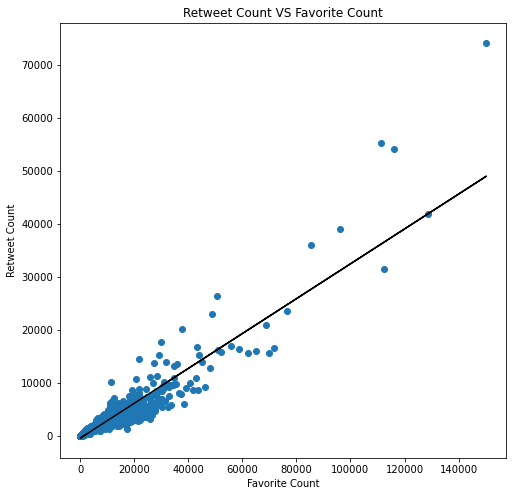

In [11]:
describe_relationship(df.favorite_count, df.retweet_count, 'Favorite Count', 'Retweet Count', 'Retweet Count VS Favorite Count')

There's a strong positive linear relationship (r = 0.93) between retweet count and favorite count. This means that it is useless to study both of the variables.

For further analysis, only retweet count will be considered.

**What's the relationship between rating numerator and retweet count ?**

The coefficient of correlation is: 0.34333140985391325
The coefficient of determination is: 0.11787645699227577
The slope of the line of best fit is: 976.0790685395527
The intercept of the line of best fit is: -8336.711524008277


<AxesSubplot:title={'center':'Retweet Count VS Rating Numerator'}, xlabel='Rating Numerator', ylabel='Retweet Count'>

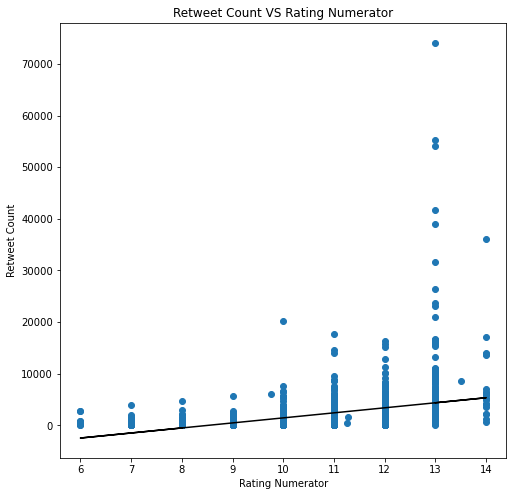

In [19]:
describe_relationship(df.rating_numerator, df.retweet_count,'Rating Numerator' ,'Retweet Count' , 'Retweet Count VS Rating Numerator')

There's a weak linear relationship (r = 0.34) betweet rating numerator and retweet count.

**What's the relationship between the predicted breed and retweet count ?**

In [61]:
# Get the breed counts
breed_counts = df.groupby('p1').count()['tweet_id'].sort_values(ascending = False)

Text(0.5, 1.0, 'The Distribution of Breed Counts')

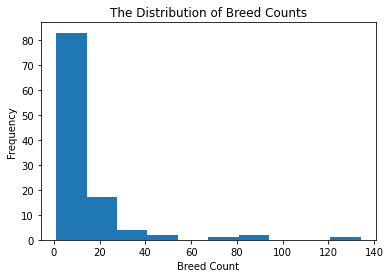

In [63]:
# Visualize the distribution of the counts
plt.hist(breed_counts)
plt.xlabel('Breed Count')
plt.ylabel('Frequency')
plt.title('The Distribution of Breed Counts')

Few breeds have a count that would be enough for a regression model.

In [69]:
# Get the breed with a count superior to 60
breed_counts[breed_counts > 60]

p1
golden_retriever      134
Labrador_retriever     89
Pembroke               85
Chihuahua              75
Name: tweet_id, dtype: int64

There are only four breeds (golden_retriever, Labrador_retriever, Pembroke, Chihuahua ) that have a count close enough to 100 to be useable in a regression model. 

In [74]:
# List of the most common breed names
common_breed_names = ['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua']
# Get a subset of the data with the most common breeds of our dataset
common_dogs = df.query('p1 in @common_breed_names')

(383, 14)

Text(0.5, 1.0, 'Median Retweet Count for the Most Common Breeds')

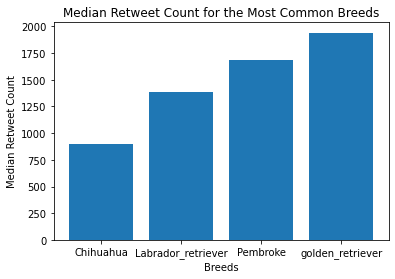

In [89]:
# Get the median retweet count for each breed
median_retweet_count = common_dogs.groupby('p1').median()['retweet_count']
# Plot the median retweet count for each breed
location = [0, 1, 2, 3]
labels = median_retweet_count.index
heights = median_retweet_count.values
plt.bar(location, heights, tick_label = labels)
plt.xlabel('Breeds')
plt.ylabel('Median Retweet Count')
plt.title('Median Retweet Count for the Most Common Breeds')

There seems to be a difference in the median retweet count according to the breed.

In order to see if this relationship is significant, the breed variable will be used to predict the retweet count in linear regression model.

In [90]:
import statsmodels.api as sm

In [96]:
# Add an intercet
common_dogs['intercept'] = 1
# Create dummy variables for the breed
common_dogs[['Chihuahua', 'Labrador_retriever', 'Pembroke', 'golden_retriever']] = pd.get_dummies(common_dogs['p1'])

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
# Create a model using Chihuahua as the baseline
model = sm.OLS(common_dogs['retweet_count'], common_dogs[['intercept', 'Labrador_retriever', 'Pembroke', 'golden_retriever']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.3237
Date:                Wed, 07 Apr 2021   Prob (F-statistic):              0.808
Time:                        17:56:56   Log-Likelihood:                -3841.1
No. Observations:                 383   AIC:                             7690.
Df Residuals:                     379   BIC:                             7706.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept           2521.6933    636.816      3.960      0.000    1269.559    3773.828
Labrador_retriever   767.7336    864.452      0.888      0.375    -931.989    2467.456
Pembroke             223.9420    873.704      0.256      0.798   -1493.973    1941.856
golden_retriever     550.4559    795.307      0.692      0.489   -1013.310    2114.222
==============================================================================
Omnibus:                      592.941   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           137833.441
Skew:                           8.299   Prob(JB):                         0.00
Kurtosis:                      94.442   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Considering a confidence interval of 95%, there is no significant difference in retweet count between the four different dog breeds.

**What's the relationship between dog stage and retweet count ?**

In [139]:
# Get the subset of the data with a non-null dog stage
df_stage = df[df.dog_stage.notnull()]
# Get the dog stage counts
dog_stage_count = df_stage.groupby('dog_stage').count()['tweet_id']
dog_stage_count

dog_stage
doggo       56
floofer      7
pupper     154
puppo       23
Name: tweet_id, dtype: int64

There is not enough puppos or floofers to use for a regression model. Only doggos and puppers will be used.

Text(0.5, 1.0, 'Median Retweet Count for the Most Common Dog Stages')

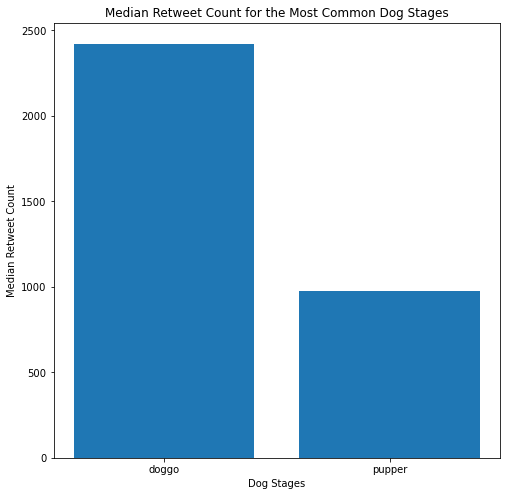

In [133]:
# Get a subset of the data with only puppers and doggos
common_dog_stages = df_stage[(df_stage.dog_stage == 'doggo') | (df_stage.dog_stage == 'pupper')]
# Get the median retweet count for each dog stage
median_retweet_count = common_dog_stages.groupby('dog_stage').median()['retweet_count']
# Plot the median retweet count for each dog stage
location = [0, 1]
heights = median_retweet_count.values
labels = median_retweet_count.index
plt.figure(figsize=(8,8))
plt.bar(location, heights, tick_label = labels)
plt.xlabel('Dog Stages')
plt.ylabel('Median Retweet Count')
plt.title('Median Retweet Count for the Most Common Dog Stages')

It seems that doggos have a higher median retweet count than puppers.

Test if the dog stage can be used to predict the retweet count using a linear regression model.

In [169]:
# Add intercept
common_dog_stages['intercept'] = 1
# Get dummies for doggo and pupper
common_dog_stages[['doggo', 'pupper']] =  pd.get_dummies(common_dog_stages.dog_stage)

In [171]:
# Use pupper as a baseline
model = sm.OLS(common_dog_stages['retweet_count'], common_dog_stages[['intercept','doggo']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     14.79
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           0.000160
Time:                        23:18:04   Log-Likelihood:                -2164.0
No. Observations:                 210   AIC:                             4332.
Df Residuals:                     208   BIC:                             4339.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2148.7857    585.327      3.671      0.000     994.851    3302.721
doggo       4359.5000   1133.482      3.846      0.000    2124.915    6594.085
==============================================================================
Omnibus:                      287.797   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19969.882
Skew:                           6.108   Prob(JB):                         0.00
Kurtosis:                      49.185   Cond. No.                         2.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With a confidence interval of 95%, both the intercept and the coefficient associated with doggo are significant.

A pupper has on average 2149 retweets. A doggo has on average 4360 more retweets than a pupper.  

<a id='conclusions'></a>
## Conclusions: 

* Retweet count and favorite count are highly correlated. A tweet with a high favorite count will also generate more retweets.
* The rating given in a tweet doesn't seem to influence the retweet count.
* The breed of a dog doesn't influence the retweet count. (for the tested breeds)
* Mentioning that a dog is a doggo will get more retweets than if it is a pupper.